In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # plotting

In [2]:
df=pd.read_csv('data.csv')

In [3]:
df.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
0,0.02,8,90,grid,220,60,40,abs,0,25,18,1.2
1,0.02,7,90,honeycomb,225,65,40,abs,25,32,16,1.4
2,0.02,1,80,grid,230,70,40,abs,50,40,8,0.8
3,0.02,4,70,honeycomb,240,75,40,abs,75,68,10,0.5
4,0.02,6,90,grid,250,80,40,abs,100,92,5,0.7


In [4]:
df.isna().sum()

layer_height          0
wall_thickness        0
infill_density        0
infill_pattern        0
nozzle_temperature    0
bed_temperature       0
print_speed           0
material              0
fan_speed             0
roughness             0
tension_strenght      0
elongation            0
dtype: int64

In [5]:
ip_df=df.iloc[:,:-3]
op_df=df.iloc[:,-3:]

In [6]:
corr=df.corr()
corr.style.background_gradient(cmap='coolwarm')

,layer_height,wall_thickness,infill_density,nozzle_temperature,bed_temperature,print_speed,fan_speed,roughness,tension_strenght,elongation
layer_height,1,-0.192571,0.00349856,-1.78055e-17,-4.92582e-18,-0.0555008,7.88131e-18,0.801341,0.33823,0.507583
wall_thickness,-0.192571,1,0.102576,-0.118493,-0.0293266,-0.419531,-0.0293266,-0.226987,0.399849,0.176364
infill_density,0.00349856,0.102576,1,0.238614,1.60082e-18,-0.0943041,2.56132e-18,0.118389,0.358464,0.159009
nozzle_temperature,-1.78055e-17,-0.118493,0.238614,1,0.602453,0,0.602453,0.348611,-0.405908,-0.527447
bed_temperature,-4.92582e-18,-0.0293266,1.60082e-18,0.602453,1,0,1,0.192142,-0.252883,-0.300871
print_speed,-0.0555008,-0.419531,-0.0943041,0,0,1,0,0.121066,-0.26459,-0.234052
fan_speed,7.88131e-18,-0.0293266,2.56132e-18,0.602453,1,0,1,0.192142,-0.252883,-0.300871
roughness,0.801341,-0.226987,0.118389,0.348611,0.192142,0.121066,0.192142,1,0.0516166,0.0989621
tension_strenght,0.33823,0.399849,0.358464,-0.405908,-0.252883,-0.26459,-0.252883,0.0516166,1,0.838109
elongation,0.507583,0.176364,0.159009,-0.527447,-0.300871,-0.234052,-0.300871,0.0989621,0.838109,1


In [7]:
len(df)

50

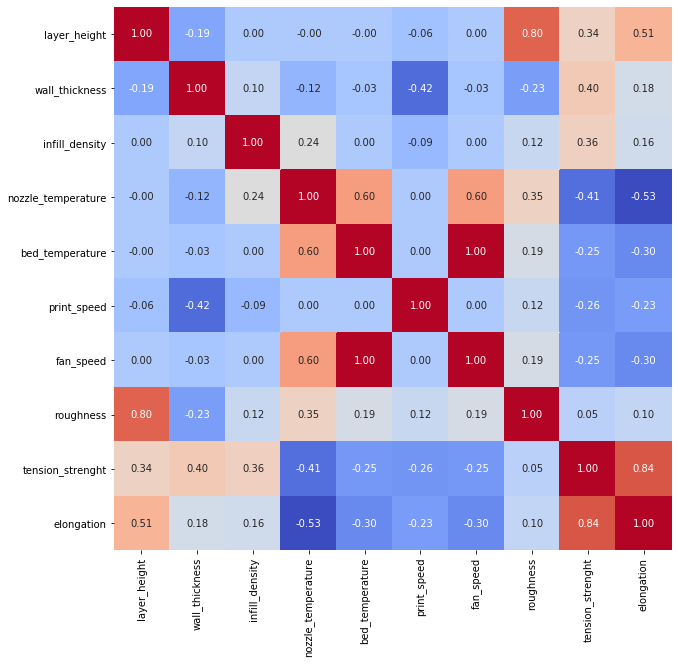

In [8]:
import seaborn as sns #import seaborn librery
fig, ax = plt.subplots(figsize=(10, 10))
#fig, ax = plt.subplots()
#fig = plt.figure(figsize=(5, 4))
#ax = plt.subplots(111)
sns.heatmap(df.corr(method='pearson'), annot=True, fmt='.2f', 
            cmap=plt.get_cmap('coolwarm'), cbar=False, ax=ax)

#ax.set_ylim(len(df)-0.5, -0.5)
ax.set_ylim(10,0)
#ax.set_xlim(len(df),0)
#ax.set_ylim(len(df),0)
#ax.set_ylim(0)
ax.set_yticklabels(ax.get_yticklabels(), rotation="horizontal")

#plt.figure(figsize=(10, 4))
plt.savefig('result.png', bbox_inches='tight',pad_inches=0.1)

In [9]:
#converting text labels to numbers
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['infill_pattern'] = labelencoder.fit_transform(df['infill_pattern'])

labelencoder1 = LabelEncoder()
df['material'] = labelencoder1.fit_transform(df['material'])

In [10]:
df.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
0,0.02,8,90,0,220,60,40,0,0,25,18,1.2
1,0.02,7,90,1,225,65,40,0,25,32,16,1.4
2,0.02,1,80,0,230,70,40,0,50,40,8,0.8
3,0.02,4,70,1,240,75,40,0,75,68,10,0.5
4,0.02,6,90,0,250,80,40,0,100,92,5,0.7


In [11]:
#selecting all the columns except the ones with catagorical values
df1=df[df.columns.difference(["infill_pattern", "material"])]

In [12]:
df1.head()

,bed_temperature,elongation,fan_speed,infill_density,layer_height,nozzle_temperature,print_speed,roughness,tension_strenght,wall_thickness
0,60,1.2,0,90,0.02,220,40,25,18,8
1,65,1.4,25,90,0.02,225,40,32,16,7
2,70,0.8,50,80,0.02,230,40,40,8,1
3,75,0.5,75,70,0.02,240,40,68,10,4
4,80,0.7,100,90,0.02,250,40,92,5,6


In [13]:
normalized_df=(df1-df1.min())/(df1.max()-df1.min())

In [14]:
normalized_df.head()

,bed_temperature,elongation,fan_speed,infill_density,layer_height,nozzle_temperature,print_speed,roughness,tension_strenght,wall_thickness
0,0.00,0.275862,0.00,1.000,0.0,0.4,0.0,0.011527,0.424242,0.777778
1,0.25,0.344828,0.25,1.000,0.0,0.5,0.0,0.031700,0.363636,0.666667
2,0.50,0.137931,0.50,0.875,0.0,0.6,0.0,0.054755,0.121212,0.000000
3,0.75,0.034483,0.75,0.750,0.0,0.8,0.0,0.135447,0.181818,0.333333
4,1.00,0.103448,1.00,1.000,0.0,1.0,0.0,0.204611,0.030303,0.555556


In [15]:
n_df1=pd.concat([normalized_df, df['infill_pattern'], df['material']], axis=1)

In [16]:
n_df1.head()

,bed_temperature,elongation,fan_speed,infill_density,layer_height,nozzle_temperature,print_speed,roughness,tension_strenght,wall_thickness,infill_pattern,material
0,0.00,0.275862,0.00,1.000,0.0,0.4,0.0,0.011527,0.424242,0.777778,0,0
1,0.25,0.344828,0.25,1.000,0.0,0.5,0.0,0.031700,0.363636,0.666667,1,0
2,0.50,0.137931,0.50,0.875,0.0,0.6,0.0,0.054755,0.121212,0.000000,0,0
3,0.75,0.034483,0.75,0.750,0.0,0.8,0.0,0.135447,0.181818,0.333333,1,0
4,1.00,0.103448,1.00,1.000,0.0,1.0,0.0,0.204611,0.030303,0.555556,0,0


In [65]:
# n_df1_test_train=n_df1.iloc[:-1,:]
# n_df1_valid=n_df1.iloc[-1:,:]

In [68]:
n_df1_test_train=n_df1
#n_df1_valid=n_df1.iloc[-1:,:]

In [89]:
##n_df1.shape

In [88]:
#n_df1_test_train.shape

In [87]:
#n_df1_valid.shape

In [69]:
# X=df.iloc[:,:-3]
# y=df.iloc[:,-3:]
y1=n_df1_test_train[['roughness']]
y2=n_df1_test_train[['tension_strenght']]
y3=n_df1_test_train[['elongation']]
X=n_df1_test_train[n_df1_test_train.columns.difference(['roughness', 'tension_strenght', 'elongation'])]

In [70]:
X.head()

,bed_temperature,fan_speed,infill_density,infill_pattern,layer_height,material,nozzle_temperature,print_speed,wall_thickness
0,0.00,0.00,1.000,0,0.0,0,0.4,0.0,0.777778
1,0.25,0.25,1.000,1,0.0,0,0.5,0.0,0.666667
2,0.50,0.50,0.875,0,0.0,0,0.6,0.0,0.000000
3,0.75,0.75,0.750,1,0.0,0,0.8,0.0,0.333333
4,1.00,1.00,1.000,0,0.0,0,1.0,0.0,0.555556


In [71]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.5, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.33, random_state=42)
X3_train, X3_test, y3_train, y3_test = train_test_split(X, y3, test_size=0.33, random_state=42)

In [72]:
#linear regression
from sklearn.linear_model import LinearRegression
linreg = LinearRegression().fit(X1_train, y1_train)
print('R-squared score X1-roughness(training): {:.3f}'
     .format(linreg.score(X1_train, y1_train)))
print('R-squared score X1-roughness(test): {:.3f}'
     .format(linreg.score(X1_test, y1_test)))

R-squared score X1-roughness(training): 0.907
R-squared score X1-roughness(test): 0.746


In [1]:
#plotting actual vs predicted
# y1_pred=linreg.predict(X1_test)
# plt.scatter(X1_test, y1_test,  color='gray')
# plt.plot(X1_test, y1_pred, color='red', linewidth=2)
# plt.show()

In [73]:
from sklearn.linear_model import LinearRegression
linreg2 = LinearRegression().fit(X2_train, y2_train)
print('R-squared score X2-tension_strength(training): {:.3f}'
     .format(linreg2.score(X2_train, y2_train)))
print('R-squared score X2-tension_strength(test): {:.3f}'
     .format(linreg2.score(X2_test, y2_test)))

R-squared score X2-tension_strength(training): 0.652
R-squared score X2-tension_strength(test): 0.662


In [74]:
from sklearn.linear_model import LinearRegression
linreg3 = LinearRegression().fit(X3_train, y3_train)
print('R-squared score X3-elongation(training): {:.3f}'
     .format(linreg3.score(X3_train, y3_train)))
print('R-squared score X3-elongation(test): {:.3f}'
     .format(linreg3.score(X3_test, y3_test)))

R-squared score X3-elongation(training): 0.718
R-squared score X3-elongation(test): 0.663


In [44]:
# Fitting Polynomial Regression to the dataset 
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 4) 
X1_train_poly = poly.fit_transform(X1_train) 
X1_test_poly = poly.fit_transform(X1_test) 

poly.fit(X1_train_poly, y1_train) 
lin2 = LinearRegression() 
lin2.fit(X1_train_poly, y1_train) 

print('R-squared score X1_poly-roughness(training): {:.3f}'
     .format(lin2.score(X1_train_poly, y1_train)))
print('R-squared score X1_poly-roughness(test): {:.3f}'
     .format(lin2.score(X1_test_poly, y1_test)))

R-squared score X1_poly(training): 1.000
R-squared score X1_poly(test): 0.619


In [36]:
# Fitting Polynomial Regression to the dataset 
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 4) 
X2_train_poly = poly.fit_transform(X2_train) 
X2_test_poly = poly.fit_transform(X2_test) 

poly.fit(X2_train_poly, y2_train) 
lin2_2 = LinearRegression() 
lin2_2.fit(X2_train_poly, y2_train) 

print('R-squared score X2_poly-tensileStrength(training): {:.3f}'
     .format(lin2_2.score(X2_train_poly, y2_train)))
print('R-squared score X2_poly-tensileStrength(test): {:.3f}'
     .format(lin2_2.score(X2_test_poly, y2_test)))

R-squared score X2_poly-tensileStrength(training): 1.000
R-squared score X2_poly-tensileStrength(test): -0.713


In [37]:
# Fitting Polynomial Regression to the dataset 
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 4) 
X3_train_poly = poly.fit_transform(X3_train) 
X3_test_poly = poly.fit_transform(X3_test) 

poly.fit(X3_train_poly, y3_train) 
lin2_3 = LinearRegression() 
lin2_3.fit(X3_train_poly, y3_train) 

print('R-squared score X3_poly-elongation(training): {:.3f}'
     .format(lin2_3.score(X3_train_poly, y3_train)))
print('R-squared score X3_poly-elongation(test): {:.3f}'
     .format(lin2_3.score(X3_test_poly, y3_test)))

R-squared score X3_poly-elongation(training): 1.000
R-squared score X3_poly-elongation(test): 0.395


In [75]:
#nural net
from sklearn.neural_network import MLPRegressor
#mlpreg = MLPRegressor(hidden_layer_sizes = [100,100],activation = 'tanh',alpha = 0.0003,solver = 'lbfgs').fit(X1_train, y1_train)
mlpreg = MLPRegressor(hidden_layer_sizes = [100,100],activation = 'relu',alpha = 0.0003,solver = 'lbfgs').fit(X1_train, y1_train)

print('R-squared score X1_nn(training): {:.3f}'
     .format(mlpreg.score(X1_train, y1_train)))
print('R-squared score X1_nn(test): {:.3f}'
     .format(mlpreg.score(X1_test, y1_test)))

R-squared score X1_nn(training): 1.000
R-squared score X1_nn(test): 0.828


/home/suvo/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [76]:
#nural net
from sklearn.neural_network import MLPRegressor
#mlpreg = MLPRegressor(hidden_layer_sizes = [100,100],activation = 'tanh',alpha = 0.0003,solver = 'lbfgs').fit(X1_train, y1_train)
mlpreg2 = MLPRegressor(hidden_layer_sizes = [100,100],activation = 'relu',alpha = 0.0003,solver = 'lbfgs').fit(X2_train, y2_train)

print('R-squared score X2_nn-tensileStrength(training): {:.3f}'
     .format(mlpreg2.score(X2_train, y2_train)))
print('R-squared score X1_nn-tensileStrength(test): {:.3f}'
     .format(mlpreg2.score(X2_test, y2_test)))

/home/suvo/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R-squared score X2_nn-tensileStrength(training): 1.000
R-squared score X1_nn-tensileStrength(test): 0.532


In [77]:
#nural net
from sklearn.neural_network import MLPRegressor
#mlpreg = MLPRegressor(hidden_layer_sizes = [100,100],activation = 'tanh',alpha = 0.0003,solver = 'lbfgs').fit(X1_train, y1_train)
mlpreg3 = MLPRegressor(hidden_layer_sizes = [100,100],activation = 'relu',alpha = 0.0003,solver = 'lbfgs').fit(X3_train, y3_train)

print('R-squared score X3_nn-elongation(training): {:.3f}'
     .format(mlpreg3.score(X3_train, y3_train)))
print('R-squared score X3_nn-elongation(test): {:.3f}'
     .format(mlpreg3.score(X3_test, y3_test)))

/home/suvo/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R-squared score X3_nn-elongation(training): 1.000
R-squared score X3_nn-elongation(test): 0.676


In [84]:
#n_df1_valid

In [86]:
#n_df1_valid_X=n_df1_valid[n_df1_valid.columns.difference(['roughness', 'tension_strenght', 'elongation'])]

In [85]:
#n_df1_valid_X.iloc[1:2,:]

In [90]:
X1_test.iloc[1:2,:]

,bed_temperature,fan_speed,infill_density,infill_pattern,layer_height,material,nozzle_temperature,print_speed,wall_thickness
39,1.0,1.0,0.0,1,0.722222,1,0.4,0.25,0.0


In [91]:
y1_test.iloc[1:2,:]

,roughness
39,0.409222


In [65]:
#mlpreg.predict(n_df1_valid_X.iloc[1:2,:])

array([0.60250315])

In [92]:
mlpreg.predict(X1_test.iloc[1:2,:])

array([0.3029848])

In [78]:
#KNN regression
from sklearn.neighbors import KNeighborsRegressor
knnreg = KNeighborsRegressor(n_neighbors = 1).fit(X1_train, y1_train)

print('R-squared score X1_knnreg(training): {:.3f}'
     .format(knnreg.score(X1_train, y1_train)))
print('R-squared score X1_knnreg(test): {:.3f}'
     .format(knnreg.score(X1_test, y1_test)))

R-squared score X1_knnreg(training): 1.000
R-squared score X1_knnreg(test): -0.150


In [79]:
#KNN regression-X2
from sklearn.neighbors import KNeighborsRegressor
knnreg2 = KNeighborsRegressor(n_neighbors = 1).fit(X2_train, y2_train)

print('R-squared score X2_knnreg-tensileStrength(training): {:.3f}'
     .format(knnreg2.score(X2_train, y2_train)))
print('R-squared score X2_knnreg-tensileStrength(test): {:.3f}'
     .format(knnreg2.score(X2_test, y2_test)))

R-squared score X2_knnreg-tensileStrength(training): 1.000
R-squared score X2_knnreg-tensileStrength(test): 0.014


In [80]:
#KNN regression-X3
from sklearn.neighbors import KNeighborsRegressor
knnreg3 = KNeighborsRegressor(n_neighbors = 1).fit(X3_train, y3_train)

print('R-squared score X3_knnreg-elongation(training): {:.3f}'
     .format(knnreg3.score(X3_train, y3_train)))
print('R-squared score X3_knnreg-elongation(test): {:.3f}'
     .format(knnreg3.score(X3_test, y3_test)))

R-squared score X3_knnreg-elongation(training): 1.000
R-squared score X3_knnreg-elongation(test): -0.304


In [25]:
# fig, subaxes = plt.subplots(1, 2, figsize=(18,14))
# X_predict_input = np.linspace(-3, 3, 50).reshape(-1,1)
# #X_train, X_test, y_train, y_test = train_test_split(X_R1[0::5], y_R1[0::5], random_state = 0)

# for thisaxis, K in zip(subaxes, [1, 3]):
#     knnreg = KNeighborsRegressor(n_neighbors = K).fit(X1_train, y1_train)
#     y_predict_output = knnreg.predict(X_predict_input)
#     thisaxis.set_xlim([-2.5, 0.75])
#     thisaxis.plot(X_predict_input, y_predict_output, '^', markersize = 10,
#                  label='Predicted', alpha=0.8)
#     thisaxis.plot(X1_train, y1_train, 'o', label='True Value', alpha=0.8)
#     thisaxis.set_xlabel('Input feature')
#     thisaxis.set_ylabel('Target value')
#     thisaxis.set_title('KNN regression (K={})'.format(K))
#     thisaxis.legend()
# plt.tight_layout()

In [81]:
#ridge regression
from sklearn.linear_model import Ridge
#X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,random_state = 0)

linridge = Ridge(alpha=20.0).fit(X1_train, y1_train)

print('R-squared score X1_ridgereg(training): {:.3f}'
     .format(linridge.score(X1_train, y1_train)))
print('R-squared score X1_ridgereg(test): {:.3f}'
     .format(linridge.score(X1_test, y1_test)))

R-squared score X1_ridgereg(training): 0.301
R-squared score X1_ridgereg(test): 0.169


In [82]:
#ridge regression-X2
from sklearn.linear_model import Ridge
#X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,random_state = 0)

linridge2 = Ridge(alpha=20.0).fit(X2_train, y2_train)

print('R-squared score X2_ridgereg-tensileStrength(training): {:.3f}'
     .format(linridge2.score(X2_train, y2_train)))
print('R-squared score X2_ridgereg-tensileStrength(test): {:.3f}'
     .format(linridge2.score(X2_test, y2_test)))

R-squared score X2_ridgereg-tensileStrength(training): 0.231
R-squared score X2_ridgereg-tensileStrength(test): 0.152


In [83]:
#ridge regression-X3
from sklearn.linear_model import Ridge
#X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,random_state = 0)

linridge3 = Ridge(alpha=20.0).fit(X3_train, y3_train)

print('R-squared score X3_ridgereg-elongation(training): {:.3f}'
     .format(linridge3.score(X3_train, y3_train)))
print('R-squared score X3_ridgereg-elongation(test): {:.3f}'
     .format(linridge3.score(X3_test, y3_test)))

R-squared score X3_ridgereg-elongation(training): 0.269
R-squared score X3_ridgereg-elongation(test): 0.220
